In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
path = os.path.dirname(os.getcwd()) + "/data/snoring/spectrograms/"

hf = h5py.File(path + "4.h5", 'r')
spectrograms = np.array(hf.get('spectrograms'))
targets = np.array(hf.get('targets')).astype(np.long)
hf.close()
print(spectrograms.shape)

(7831, 129, 30)


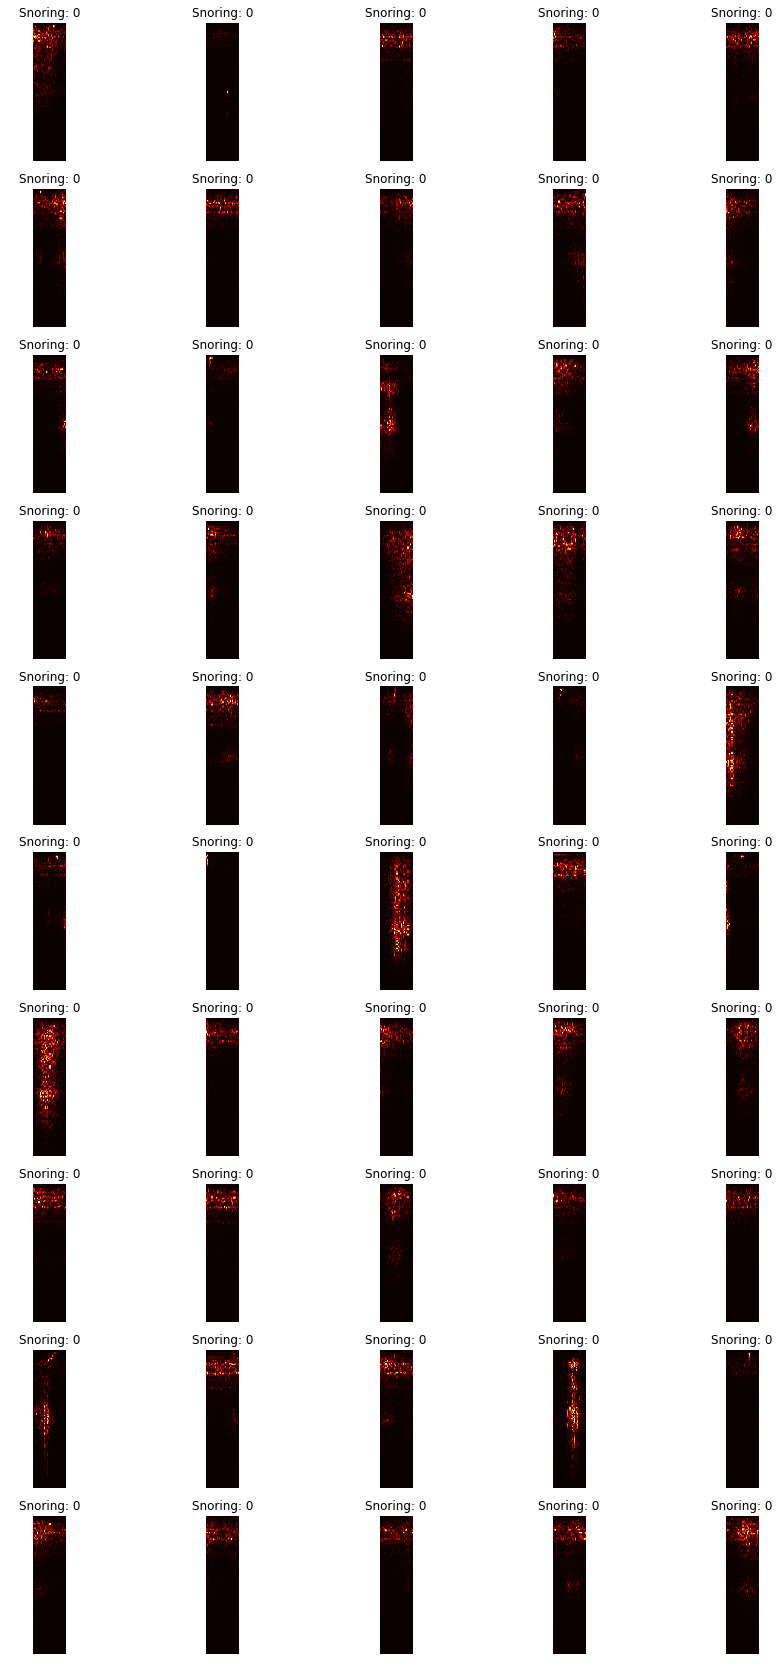

In [3]:
fig=plt.figure(figsize=(15, 30))
columns = 5
rows = 10
for i in range(1, columns*rows +1):
    img = spectrograms[i + 0]
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.title("Snoring: " + str(targets[i + 0]))
    plt.imshow(img, cmap="hot")

plt.show()

In [4]:
train_data = np.empty(shape=(1, 129, 30))
train_labels = np.empty(shape=(1))
train_cls = np.empty(shape=(1))

test_data = np.empty(shape=(1, 129, 30))
test_labels = np.empty(shape=(1))
test_cls = np.empty(shape=(1))
for f in os.listdir(path):
    print(f)
    hf = h5py.File(path + f, 'r')
    spectrograms = np.array(hf.get('spectrograms'))
    targets = np.array(hf.get('targets')).astype(np.long)
    cls = np.array(hf.get('class')).astype(np.long)
    hf.close()
    
    n = cls.shape[0]
    index = np.random.permutation(n)
    index_train = index[:int(4*n/5)]
    index_test = index[int(4*n/5):]
       
    train_spectrograms = spectrograms[index_train]
    test_spectrograms = spectrograms[index_test]
    train_targets = targets[index_train]
    test_targets = targets[index_test]
    train_class = cls[index_train]
    test_class = cls[index_test]

    
    
    train_data = np.concatenate([train_data, train_spectrograms])
    train_labels = np.concatenate([train_labels, train_targets])
    train_cls = np.concatenate([train_cls, train_class])
    
    test_data = np.concatenate([test_data, test_spectrograms])
    test_labels = np.concatenate([test_labels, test_targets])
    test_cls = np.concatenate([test_cls, test_class])

4.h5
5.h5
1.h5
7.h5
8.h5
9.h5


In [5]:
print(train_data.shape)
print(train_labels.shape)
print(train_cls.shape)

hf = h5py.File(os.path.dirname(os.getcwd()) + "/data/snoring/train_snoring1s.h5", 'w')
hf.create_dataset('spectrograms', data=train_data[1:])
hf.create_dataset('targets', data=train_labels[1:])
hf.create_dataset('class', data=train_cls[1:])
hf.close()

print(test_data.shape)
print(test_labels.shape)
print(test_cls.shape)
hf = h5py.File(os.path.dirname(os.getcwd()) + "/data/snoring/test_snoring1s.h5", 'w')
hf.create_dataset('spectrograms', data=test_data[1:])
hf.create_dataset('targets', data=test_labels[1:])
hf.create_dataset('class', data=test_cls[1:])
hf.close()

(35632, 129, 30)
(35632,)
(35632,)
(8912, 129, 30)
(8912,)
(8912,)
